In [1]:
# Imports
import warnings
import numpy as np
import pandas as pd
import pyfixest as pf
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
import statsmodels.api as sm
from typing import List
from stargazer.stargazer import Stargazer
from IPython.display import display, Latex, Markdown
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/akhandelwal8/globaleconomics/refs/heads/main/hwk/hwk5_gravity_GRC.csv", sep='\t')

## Question 1

In [4]:
sortedData = data.sort_values(by='value',ascending=False)

print(sortedData.head(5))
totalTrade = np.sum(sortedData['value'])
top5frac = np.sum(sortedData['value'].head(5))/totalTrade
top5frac

     year iso_o iso_d     value         gdp_d      dist  border  comlang  \
109  2019   GRC   ITA  4085.217  2.000000e+09  1112.724     0.0      0.0   
60   2019   GRC   DEU  2518.291  3.860000e+09  1810.254     0.0      0.0   
223  2019   GRC   TUR  2191.733  7.610000e+08   776.297     1.0      0.0   
57   2019   GRC   CYP  2126.615  2.490000e+07   957.481     0.0      1.0   
23   2019   GRC   BGR  1746.437  6.860000e+07   526.368     1.0      0.0   

     comleg  
109     1.0  
60      0.0  
223     1.0  
57      0.0  
23      0.0  


np.float64(0.33942587981558037)

## Question 2

In [6]:
data['lnVal'] = np.log(1+data['value'])
data['lnDist'] = np.log(data['dist'])

x1 = data.loc[:,['lnDist']]
x1 = sm.add_constant(x1)
y1 = data['lnVal']
model1 = sm.OLS(y1,x1,missing='drop')
res1 = model1.fit(cov_type="HC1")

stargazer = Stargazer([res1])
stargazer.covariate_order(['lnDist','const'])
stargazer.custom_columns(['Model 1'])
stargazer.dependent_variable_name('ln(Value)')
stargazer

## Question 3

In [ ]:
data['lnGDPd'] = np.log(data['gdp_d'])

x2 = data.loc[:,['lnDist','lnGDPd']]
x2 = sm.add_constant(x2)
y2 = data['lnVal']
model2 = sm.OLS(y2,x2,missing='drop')
res2 = model2.fit(cov_type="HC1")

stargazer = Stargazer([res2])
stargazer.covariate_order(['lnDist','lnGDPd','const'])
stargazer.custom_columns(['Model 2'])
stargazer.dependent_variable_name('ln(Value)')
stargazer

## Question 4

#### a

In [13]:
data['lnTradeCtrlForSize'] = data['lnVal']-(res2.params['const'] + res2.params['lnGDPd']*data['lnGDPd'])
    
x3 = data.loc[:,['lnDist']]
x3 = sm.add_constant(x3)
y3 = data['lnTradeCtrlForSize']
model3 = sm.OLS(y3,x3,missing='drop')
res3 = model3.fit(cov_type="HC1")

stargazer = Stargazer([res3])
stargazer.covariate_order(['lnDist','const'])
stargazer.custom_columns(['Model 3'])
stargazer.dependent_variable_name('ln(Value)')
stargazer

#### c

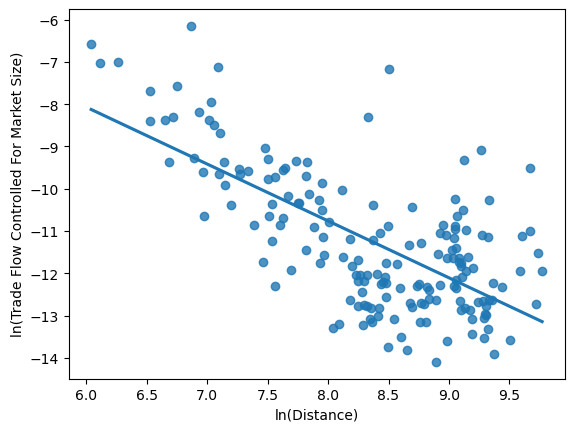

In [ ]:
plt.figure()

sns.regplot(x='lnDist', y='lnTradeCtrlForSize', data=data.loc[:,['lnDist','lnTradeCtrlForSize']],ci=None)
plt.xlabel("ln(Distance)")
plt.ylabel("ln(Trade Flow Controlled For Market Size)")

plt.show()

## Question 5

In [20]:
x4 = data.loc[:,['lnDist','lnGDPd','comlang','border']]
x4 = sm.add_constant(x4)
y4 = data['lnVal']
model4 = sm.OLS(y4,x4,missing='drop')
res4 = model4.fit(cov_type="HC1")

stargazer = Stargazer([res4])
stargazer.covariate_order(['lnDist','lnGDPd','comlang','border','const'])
stargazer.custom_columns(['Model 4'])
stargazer.dependent_variable_name('ln(Value)')
stargazer

In [21]:
EU = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU',
      'GRC','HUN','IRL','ITA','LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU',
      'SVK','SVN','ESP','SWE']
data['inEU'] = data['iso_d'].isin(EU).astype(int)

x5 = data.loc[:,['lnDist','lnGDPd','comlang','border','inEU']]
x5 = sm.add_constant(x5)
y5 = data['lnVal']
model5 = sm.OLS(y5,x5,missing='drop')
res5 = model5.fit(cov_type="HC1")

stargazer = Stargazer([res5])
stargazer.covariate_order(['lnDist','lnGDPd','comlang','border','inEU','const'])
stargazer.custom_columns(['Model 5'])
stargazer.dependent_variable_name('ln(Value)')
stargazer